In [22]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

cluster = 'a2744'

In [32]:
def plotbars(mode, ax):
    chain1 = np.load("Files/mcmc/" + cluster + "/" + "sigma" + "-mc-main.npy")
    chain2 = np.load("Files/mcmc/" + cluster + "/" + mode + "-mc-main.npy")

    plabels = ['bgal', 'agal', 'alos',
         'b1', 'x1', 'y1', 'ec1', 'es1', 's1',
         'b2', 'x2', 'y2', 'ec2', 'es2', 's2',
         'b3', 'x3', 'y3', 'ec3', 'es3', 's3',
         'gc', 'gs']

    ndim = chain1.shape[1]
    stats = []


    for i in range(ndim):
        stats.append(ks_2samp(chain1[:,i], chain2[:,i]).statistic)
        
    ax.set_xticks(range(ndim))
    ax.set_xticklabels(plabels)

    ax.bar(range(ndim), stats)
    ax.set_title(mode)



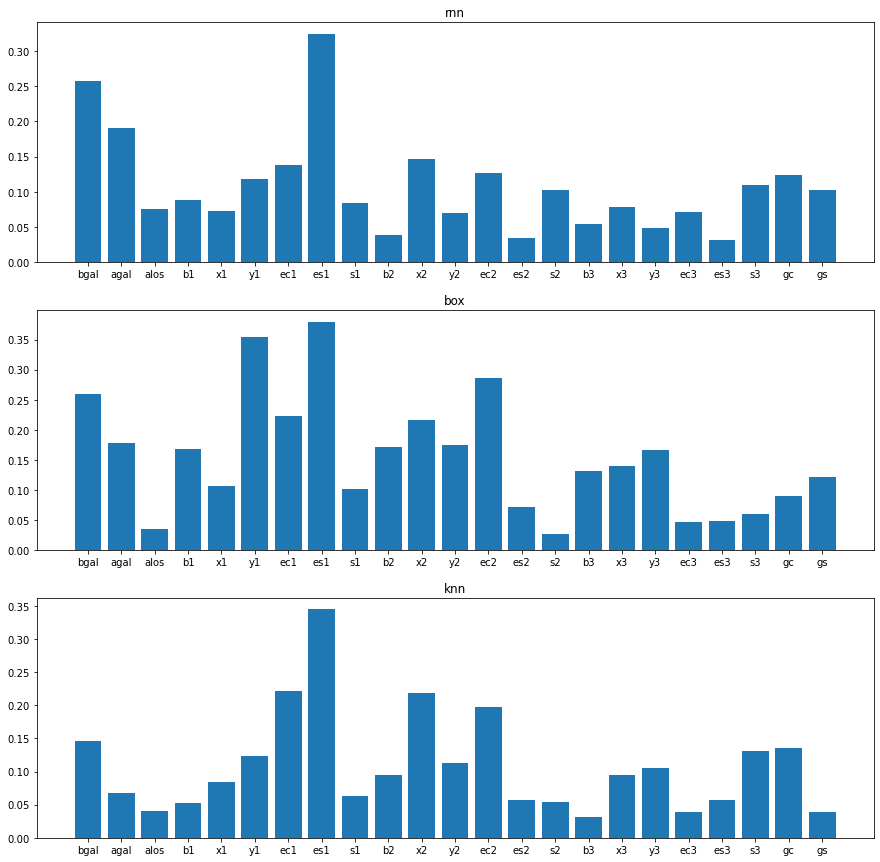

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 15))

plotbars("rnn", ax1)
plotbars("box", ax2)
plotbars("knn", ax3)